In [1]:
from pathlib import Path
import sys
#Set root to be the main project folder
root = Path.cwd().parent.parent
print(root)
py_path = Path(root/'code/py_files')
print(py_path)
data_path = Path(root/'data')
print(data_path)
notes_path = Path(root/'notes')
print(notes_path)

#Add location of py files to path so we can import
sys.path.insert(0,str(py_path))

C:\Users\Michal\Documents\GitHub\FeedforwardNeuralNetwork
C:\Users\Michal\Documents\GitHub\FeedforwardNeuralNetwork\code\py_files
C:\Users\Michal\Documents\GitHub\FeedforwardNeuralNetwork\data
C:\Users\Michal\Documents\GitHub\FeedforwardNeuralNetwork\notes


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
from ANNfeedforward import NeuralNetwork

## Example: Digit Recognition - MNIST

In [3]:
npzfile = np.load(data_path/"mnist_data_set/data_mnist.npz")
npzfile.files

x_train = npzfile["X_train"]
y_train = npzfile["y_train"]
x_test = npzfile["X_test"]
y_test = npzfile["y_test"]

size_input_lay = x_train.shape[1]
size_output_lay = y_train.shape[1]

In [4]:
x_train.shape[0]

60000

In [5]:
shape = (size_input_lay, 64, size_output_lay)
ActFun =  ["ReLu", "sigmoid"]

In [6]:
DigitRecog = NeuralNetwork(shape, ActFun)

In [7]:
epochs = 3

In [8]:
DigitRecog.train(x_train, y_train, epochs, optimizer = "sgd", minibatch_size = 50, learning_rate = 0.5 )

epochs:  33%|█████████████████████████▎                                                  | 1/3 [00:29<00:59, 29.94s/it]

loss: 0.010318887817380449, accuracy: 0.9413166666666667


epochs:  67%|██████████████████████████████████████████████████▋                         | 2/3 [01:03<00:31, 31.02s/it]

loss: 0.007106073383938957, accuracy: 0.9604333333333334


epochs: 100%|████████████████████████████████████████████████████████████████████████████| 3/3 [01:38<00:00, 32.89s/it]

loss: 0.005990385286918597, accuracy: 0.9682166666666666


In [9]:
DigitRecog.score(x_test, y_test)

0.9637

In [10]:
DigitRecog.loss(x_test, y_test)

0.0065928776183313805

# Example: Fashion MNIST

In [11]:
npzfile = np.load(data_path/"mnist_data_set/data_fashion_mnist.npz")
npzfile.files

x_train = npzfile["X_train"]
y_train = npzfile["y_train"]
x_test = npzfile["X_test"]
y_test = npzfile["y_test"]

size_input_lay = x_train.shape[1]
size_output_lay = y_train.shape[1]

In [12]:
x_train.shape[0]

60000

In [13]:
shape = (size_input_lay, 64, size_output_lay)
ActFun =  ["ReLu", "sigmoid"]

In [20]:
FashionRecog = NeuralNetwork(shape, ActFun)

In [21]:
epochs = 3

In [22]:
FashionRecog.train(x_train, y_train, epochs, optimizer = "sgd", minibatch_size = 50, learning_rate = 0.5 )

epochs:  33%|█████████████████████████▎                                                  | 1/3 [00:39<01:18, 39.16s/it]

loss: 0.022753356988897085, accuracy: 0.8455833333333334


epochs:  67%|██████████████████████████████████████████████████▋                         | 2/3 [01:15<00:38, 38.42s/it]

loss: 0.01998421640273859, accuracy: 0.8677166666666667


epochs: 100%|████████████████████████████████████████████████████████████████████████████| 3/3 [01:52<00:00, 37.51s/it]

loss: 0.019101204657911614, accuracy: 0.8733666666666666


In [23]:
FashionRecog.score(x_test, y_test)

0.8554

In [24]:
FashionRecog.loss(x_test, y_test)

0.021427487617761736

# Example: Exponential map

In [50]:
x_train= np.linspace(0, 10, 1000)
y_train = np.exp(-x_train)

In [51]:
x_train  = x_train.reshape(1000, 1)

In [52]:
shape = (1, 1)
ActFun =  ["sigmoid"]

In [53]:
ExpFun = NeuralNetwork(shape, ActFun)

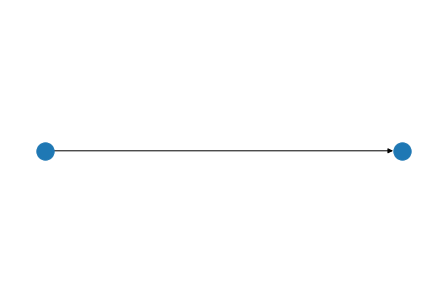

In [54]:
ExpFun.plotnetwork()

In [58]:
epochs = 100
ExpFun.train(x_train, y_train, epochs, minibatch_size = 50, learning_rate = 0.5, mnist=False)

epochs: 100%|████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.38it/s]


In [59]:
pred_y = [ExpFun.feedforward(x) for x in x_train]

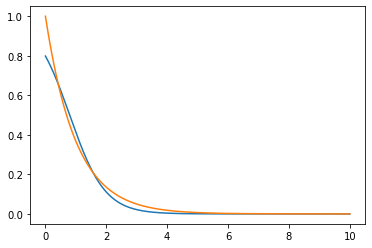

In [60]:
plt.plot(x_train, pred_y)
plt.plot(x_train, y_train)
plt.show()

## Example: XOR issue

In [67]:
x = np.array([[0.0, 0.0], [0.0, 0.1], [1.0, 0.0], [1.0, 1.0]])
y = np.array([0.0,1.0,1.0,0.0])

In [68]:
shape = (2,5, 1)
ActFun =  ["sigmoid"]
XOR_net = NeuralNetwork(shape, ActFun)

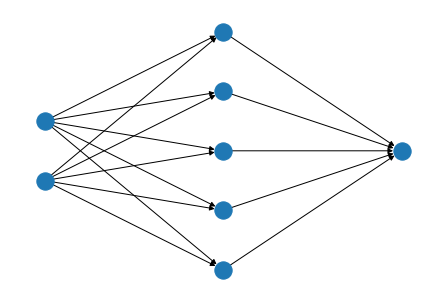

In [69]:
XOR_net.plotnetwork()

In [70]:
epochs = 10000

In [71]:
XOR_net.train(x, y, epochs, minibatch_size = 3, learning_rate = 0.5,  mnist=False)

epochs: 100%|██████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1901.06it/s]


In [72]:
[XOR_net.feedforward(x_el) for x_el in x]

[array([0.0539032]),
 array([0.94321156]),
 array([0.99335057]),
 array([0.02459765])]